# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn import linear_model
import matplotlib.ticker as mtick

import statsmodels.api as sm
import statistics
from scipy.stats import shapiro

import matplotlib.pyplot as plt
from scipy.stats import probplot

import statsmodels.api as sm
from sklearn import linear_model
from scipy.stats import ranksums


Input = 'Input22'
output = 'Output22'

colors = ['#51BBFF', '#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw blauw
colors2 = ['#6CC24A','#FFB81C', '#A50034'] # groen geel rood
colors3 = ['#A50034','#FFB81C', '#6CC24A'] # groen geel rood

# Load data

In [2]:
GB = pd.read_csv(f'1_Input/{Input}/GB.csv', index_col=0)
USA = pd.read_csv(f'1_Input/{Input}/USA.csv', index_col=0)
FR = pd.read_csv(f'1_Input/{Input}/FR.csv', index_col=0)
BE = pd.read_csv(f'1_Input/{Input}/BE.csv', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl_USA = ['1981 - 1989', '1990 - 1999', '2000 - 2009']
yrsl_be = ['1999 - 2008', '2009 - 2018']
yrsl_fr = ['1989 - 1998', '1999 - 2008', '2009 - 2018']


yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

GB_n = len(GB)
USA_n = len(USA)
BE_n = len(BE)
FR_n = len(FR)
n_total = GB_n + USA_n + BE_n + FR_n

print(n_total)

287


# Subquestion II) - multiple regression

In [3]:
GB2 = pd.DataFrame()
USA2 = pd.DataFrame()
BE2 = pd.DataFrame()
FR2 = pd.DataFrame()

datasets2 = [GB2, USA2, BE2, FR2]


for u in range(len(datasets)):
    dataset = datasets[u]
    dataset2 = datasets2[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                idx = dataset.index[i]

                dataset2.loc[f'{idx} {yrsl[j]}',[f'EI deviation']] = catch_dat[f'EI deviation {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'AI']] = catch_dat[f'AI {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'AI_change']] = catch_dat[f'AI_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa']] = catch_dat[f'Pa {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa_change']] = catch_dat[f'Pa_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa']] = catch_dat[f'Epa {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa_change']] = catch_dat[f'Epa_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'T']] = catch_dat[f'T {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'T_change']] = catch_dat[f'T_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'SI']] = catch_dat[f'SI {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'SI_change']] = catch_dat[f'SI_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'ST']] = catch_dat[f'ST {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'ST_change']] = catch_dat[f'ST_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur']] = catch_dat[f'is_dur {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur_change']] = catch_dat[f'is_dur_change {yrsl[j]}']

### Samenvoegen van Meuse datasets

In [4]:
ME = FR2.append(BE2)

C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_3528\3450833402.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ME = FR2.append(BE2)


In [5]:
datasets3 = datasets2[0], datasets2[1], ME

## MLR

In [6]:
results = {}

for u in range(len(datasets3)):
    dataset3 = datasets3[u]
    
    x = dataset3[['AI', 'AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']]
    y = dataset3['EI deviation']
 
    # # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # # with statsmodels
    x = sm.add_constant(x) # adding a constant
 
    model = sm.OLS(y, x).fit()
    summary = model.summary()
    
    # Get the top 3 coefficients and their variable names, with a significance level of 0.05 or lower
    coefs = pd.Series(model.params[1:], index=x.columns[1:])
    most_important = coefs[coefs.abs().nlargest(5).index]
    most_important_names = most_important.index.tolist()
    
    # Save the desired information in a dictionary
    results[f'{dataset_names[u]}'] = {
        'R-squared': f'{model.rsquared:.3f}',
        'Adjusted R-squared': f'{model.rsquared_adj:.3f}',
        'Probability (F-statistic)': f'{model.f_pvalue:.3f}',
        **{f'Coefficient {i+1}': f'{most_important_names[i]}: {most_important.iloc[i]:.3f}' for i in range(len(most_important_names))}
    }

# Create a DataFrame with the results
df = pd.DataFrame(results)
display(df)

df.to_csv(f'2_Output/{output}/Multipleregressie_short.csv')

,CAMELS GB,CAMELS USA,Meuse
R-squared,0.076,0.267,0.945
Adjusted R-squared,0.028,0.235,0.900
Probability (F-statistic),0.083,0.000,0.000
Coefficient 1,SI: -0.247,SI_change: -0.134,SI: 3.375
Coefficient 2,AI_change: 0.199,AI_change: 0.089,AI_change: -2.228
Coefficient 3,SI_change: 0.144,AI: -0.058,AI: 1.453
Coefficient 4,ST: 0.090,T_change: -0.052,SI_change: -1.257
Coefficient 5,T_change: 0.039,ST_change: 0.047,ST: -0.867


In [7]:
# Tweede tabel met informatie over de coefficienten per dataset
coeff_names = ['AI', 'AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']
results_coefficients = {}

for u in range(len(datasets3)):
    dataset3 = datasets3[u]
    
    x = dataset3[coeff_names]
    y = dataset3['EI deviation']
 
    # # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # # with statsmodels
    x = sm.add_constant(x) # adding a constant
 
    model = sm.OLS(y, x).fit()
    
    # Save the desired information in a dictionary
    coeff_signs = list(model.pvalues[1:]) + [f'Sign {dataset_names[u]}']
    coeff_values = list(model.params[1:]) + [f'Coef {dataset_names[u]}']

    
    for i, coeff_name in enumerate(coeff_names):
        if coeff_name not in results_coefficients:
            results_coefficients[coeff_name] = {}
        results_coefficients[coeff_name][f'Sign {dataset_names[u]}'] = coeff_signs[i]
        results_coefficients[coeff_name][f'Coef {dataset_names[u]}'] = coeff_values[i]

# Create a DataFrame with the coefficient results
df_coefficients = pd.DataFrame.from_dict(results_coefficients, orient='index').iloc[1:]

df_coefficients = df_coefficients.round(3)
display(df_coefficients)

df_coefficients.to_csv(f'2_Output/{output}/Multipleregressie_coefficients.csv')

,Sign CAMELS GB,Coef CAMELS GB,Sign CAMELS USA,Coef CAMELS USA,Sign Meuse,Coef Meuse
AI_change,0.047,0.199,0.153,0.089,0.000,-2.228
Pa,0.097,0.000,0.160,-0.000,0.991,0.000
Pa_change,0.079,0.000,0.812,-0.000,0.480,0.000
Epa,0.350,-0.000,0.872,0.000,0.335,-0.001
Epa_change,0.383,-0.000,0.771,0.000,0.563,-0.002
T,0.957,-0.000,0.810,-0.001,0.994,-0.000
T_change,0.107,0.039,0.000,-0.052,0.008,0.340
SI,0.020,-0.247,0.513,0.036,0.000,3.375
SI_change,0.121,0.144,0.002,-0.134,0.002,-1.257
ST,0.268,0.090,0.327,-0.023,0.173,-0.867


In [8]:
# Rearrange dataset
yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl = yrsl_GB

dataset = GB
dataset2 = pd.DataFrame()


for j in range(len(yrsl)):
    if j > 0:            
        for i in range(len(dataset)):
            catch_dat = dataset.iloc[i]
            idx = dataset.index[i]

            
            # AI = 
            dataset2.loc[f'{idx} {yrsl[j]}',[f'EI deviation']] = catch_dat[f'EI deviation {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'AI']] = catch_dat[f'AI {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'AI_change']] = catch_dat[f'AI_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa']] = catch_dat[f'Pa {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa_change']] = catch_dat[f'Pa_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa']] = catch_dat[f'Epa {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa_change']] = catch_dat[f'Epa_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'T']] = catch_dat[f'T {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'T_change']] = catch_dat[f'T_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'SI']] = catch_dat[f'SI {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'SI_change']] = catch_dat[f'SI_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'ST']] = catch_dat[f'ST {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'ST_change']] = catch_dat[f'ST_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur']] = catch_dat[f'is_dur {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur_change']] = catch_dat[f'is_dur_change {yrsl[j]}']

In [9]:
x = dataset2[['AI','AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']]
y = dataset2['EI deviation']
 
# # with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.00379112493116571
Coefficients: 
 [-1.96982382e-02  1.98954408e-01  1.84324848e-05  9.13520023e-05
 -1.04373645e-04 -4.72739377e-04 -3.11291972e-04  3.94891554e-02
 -2.47380022e-01  1.43687258e-01  9.00901290e-02 -3.42460880e-02
  2.37276834e-02 -2.11400930e-02]
                            OLS Regression Results                            
Dep. Variable:           EI deviation   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.585
Date:                Wed, 29 Mar 2023   Prob (F-statistic):             0.0829
Time:                        11:39:27   Log-Likelihood:                 566.62
No. Observations:                 285   AIC:                            -1103.
Df Residuals:                     270   BIC:                            -1048.
Df Model:                          14                                         
Covariance

# Subquestion I) Difference in ΔEI

## Check normality

In [10]:
EI_dev_total = [[], [], []] 

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                if u == 0 or u == 1:
                    EI_dev_total[u].append(EI_dev)
                elif u == 2 or u == 3:
                    EI_dev_total[2].append(EI_dev)

In [11]:
EI_dev_GB_80 = []
EI_dev_GB_90 = []
EI_dev_GB_00 = []
EI_dev_USA_90 = []
EI_dev_USA_00 = []
EI_dev_Meuse_90 = []
EI_dev_Meuse_00 = []

EI_dev_total_decades = EI_dev_GB_80, EI_dev_GB_90, EI_dev_GB_00, EI_dev_USA_90, EI_dev_USA_00, EI_dev_Meuse_90, EI_dev_Meuse_00
EI_dev_total_decades_names = "EI_dev_GB_80", "EI_dev_GB_90", "EI_dev_GB_00", "EI_dev_USA_90", "EI_dev_USA_00", "EI_dev_Meuse_90", "EI_dev_Meuse_00"

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                if u == 0:
                    if j == 1:
                        EI_dev_GB_80.append(EI_dev)
                    if j == 2:
                        EI_dev_GB_90.append(EI_dev)
                    if j == 3:
                        EI_dev_GB_00.append(EI_dev)
                if u == 1:
                    if j == 1:
                        EI_dev_USA_90.append(EI_dev)
                    if j == 2:
                        EI_dev_USA_00.append(EI_dev)
                if u == 2:
                    EI_dev_Meuse_00.append(EI_dev)
                if u == 3:
                    if j == 1:
                        EI_dev_Meuse_90.append(EI_dev)
                    if j == 2:
                        EI_dev_Meuse_00.append(EI_dev)

0

Length: 95


Dataset: EI_dev_GB_80
Shapiro-Wilk test
Test statistic: 0.6562
p-value: 0.0000

1

Length: 95


Dataset: EI_dev_GB_90
Shapiro-Wilk test
Test statistic: 0.9637
p-value: 0.0098

2

Length: 95


Dataset: EI_dev_GB_00
Shapiro-Wilk test
Test statistic: 0.9453
p-value: 0.0006

3

Length: 169


Dataset: EI_dev_USA_90
Shapiro-Wilk test
Test statistic: 0.9917
p-value: 0.4420

4

Length: 169


Dataset: EI_dev_USA_00
Shapiro-Wilk test
Test statistic: 0.9865
p-value: 0.1041

5

Length: 9


Dataset: EI_dev_Meuse_90
Shapiro-Wilk test
Test statistic: 0.8237
p-value: 0.0379

6

Length: 23


Dataset: EI_dev_Meuse_00
Shapiro-Wilk test
Test statistic: 0.9361
p-value: 0.1482



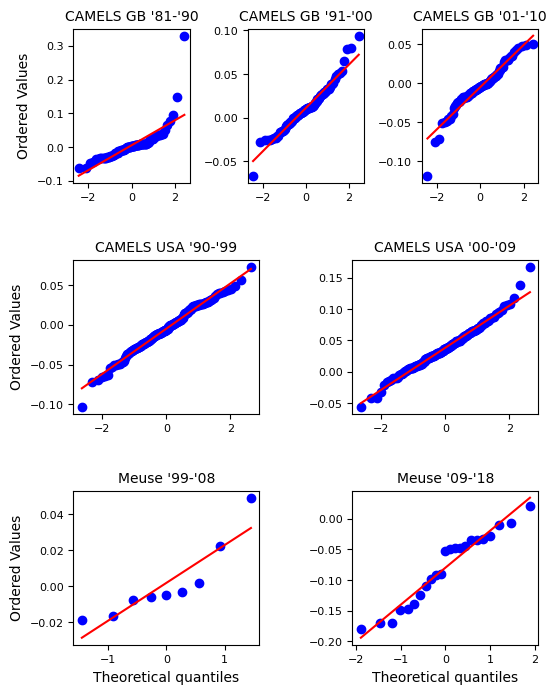

In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the less likely the sample data is to be normally distributed. The p-value is then calculated from the W statistic, and if the p-value is less than a pre-specified significance level (e.g., 0.05), we reject the null hypothesis that the sample data is normally distributed.


In [12]:
EI_dev_total_decades_titles = "CAMELS GB '81-'90", "CAMELS GB '91-'00", "CAMELS GB '01-'10", "CAMELS USA '90-'99", "CAMELS USA '00-'09", "Meuse '99-'08", "Meuse '09-'18"

for i, data in enumerate(EI_dev_total_decades):
    print(i)
    stat, p = shapiro(data)
    print(f"\nLength: {len(EI_dev_total_decades[i])}\n")
    print(f"\nDataset: {EI_dev_total_decades_names[i]}\nShapiro-Wilk test")
    print(f"Test statistic: {stat:.4f}")
    print(f"p-value: {p:.4f}\n")
    
    
fig = plt.figure(figsize=(6, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)


# maak de middelste rij van subplots
ax4 = fig.add_subplot(3, 2, 3)
ax5 = fig.add_subplot(3, 2, 4)

# maak de onderste rij van subplots
ax6 = fig.add_subplot(3, 2, 5)
ax7 = fig.add_subplot(3, 2, 6)

# Loop through the arrays in EI_dev_total
for i, data in enumerate(EI_dev_total_decades):
    if i == 0:
        ax = ax1
    elif i == 1:
        ax = ax2
    elif i == 2:
        ax = ax3
    elif i == 3:
        ax = ax4
    elif i == 4:
        ax = ax5
    elif i == 5:
        ax = ax6
    elif i == 6:
        ax = ax7
    
    probplot(data, plot=ax)
    ax.set_title(f"{EI_dev_total_decades_titles[i]}", fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

    
# Set empty string as x-axis label for the first and second row subplots
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')

ax2.set_ylabel('')
ax3.set_ylabel('')
ax5.set_ylabel('')
ax7.set_ylabel('')


# Show the figure
plt.savefig(f'2_Output/{output}/Test_normality.pdf')
plt.show()


    
print("In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the less likely the sample data is to be normally distributed. The p-value is then calculated from the W statistic, and if the p-value is less than a pre-specified significance level (e.g., 0.05), we reject the null hypothesis that the sample data is normally distributed.")

In [13]:
# Definieer de datasets en namen
EI_dev_total_decades = EI_dev_GB_80, EI_dev_GB_90, EI_dev_GB_00, EI_dev_USA_90, EI_dev_USA_00, EI_dev_Meuse_90, EI_dev_Meuse_00
EI_dev_total_decades_names = ["CAMELS GB '81-'90", "CAMELS GB '91-'00", "CAMELS GB '01-'10", "CAMELS USA '90-'99", "CAMELS USA '00-'09", "Meuse '99-'08", "Meuse '09-'18"]
# EI_dev_total_decades_names = ["CAMELS GB\n'81-'90", "CAMELS GB\n'91-'00", "CAMELS GB\n'01-'10", "CAMELS USA\n'90-'99", "CAMELS USA\n'00-'09", "Meuse\n'99-'08", "Meuse\n'09-'18"]

results = []

for i, data in enumerate(EI_dev_total_decades):
    stat, p = shapiro(data)
    results.append((EI_dev_total_decades_names[i], len(data), round(stat, 2), round(p, 3)))

df = pd.DataFrame(results, columns=["Decade", "n", "Test Statistic", "p-value"])

print(df)
df.to_csv(f'2_Output/{output}/shapiro_results.csv', index=False, line_terminator='\r\n')

               Decade    n  Test Statistic  p-value
0   CAMELS GB '81-'90   95            0.66    0.000
1   CAMELS GB '91-'00   95            0.96    0.010
2   CAMELS GB '01-'10   95            0.95    0.001
3  CAMELS USA '90-'99  169            0.99    0.442
4  CAMELS USA '00-'09  169            0.99    0.104
5       Meuse '99-'08    9            0.82    0.038
6       Meuse '09-'18   23            0.94    0.148


## Histograms per dataset

### Combining results in lists

In [14]:
EI_dev_GB = EI_dev_GB_80, EI_dev_GB_90, EI_dev_GB_00
GB_titles = EI_dev_total_decades_names[0], EI_dev_total_decades_names[1], EI_dev_total_decades_names[2]

EI_dev_USA = EI_dev_USA_90, EI_dev_USA_00
USA_titles = EI_dev_total_decades_names[3], EI_dev_total_decades_names[4]

EI_dev_Meuse = EI_dev_Meuse_90, EI_dev_Meuse_00
Meuse_titles = EI_dev_total_decades_names[5], EI_dev_total_decades_names[6]

### CAMELS GB

0.0019426181248068
0.0096995500485081
-0.0052249399049754


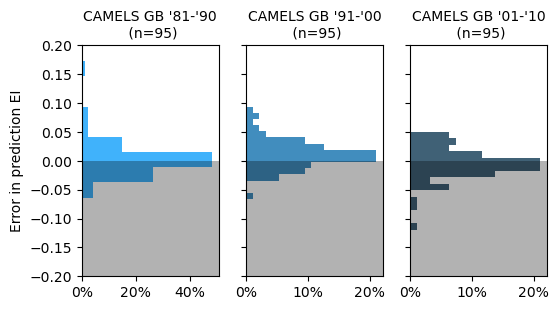

In [15]:
EI_dev = EI_dev_GB
titles = GB_titles
bins = 15
n = len(EI_dev)


fig, axs = plt.subplots(1, n)
fig.set_figheight(3)
fig.set_figwidth(6)


EI_dev_grouped = ["", "", ""]
w = ["", "", ""]
                   
    
for j in range(n):                
    w[j] = np.ones_like(EI_dev[j])/(len(EI_dev[j]))
                    
c = colors[1:4]

for j in range(n):
    EI_dev_j = EI_dev[j]
    n_EI = len(EI_dev_j)
    print(np.median(EI_dev_j))
    axs[j].hist(EI_dev_j, bins=bins, alpha = 0.75, color = c[j], weights=w[j], orientation="horizontal")
    axs[j].set_ylim(-0.2, 0.2)
    axs[j].set_ylabel('Error in prediction EI')
    # axs[j].set_xlabel('Relative frequency')
    axs[j].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axs[j].axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    axs[j].set_title(f'{titles[j]}\n (n={n_EI})', fontsize = 10)

    
axs[-1].set_yticklabels([])
axs[1].set_yticklabels([])
axs[-1].set_ylabel('')
axs[1].set_ylabel('')



# for i in range(n):
#     ax2 = axs[i].gca().twiny()
#     sns.histplot(data=EI_dev[i], element="step", fill=False,
#     cumulative=True, stat="density", common_norm=False, color=c[i], y=EI_dev[i], linewidth=2, linestyle='solid', ax=ax2)

# ax2.grid('false')
# ax2.set_xlabel('Cumulative')

# # ax2.grid(False)
# # ax2.set_facecolor("None")

plt.savefig(f'2_Output/{output}/EI_dev_GB.pdf')   

### CAMELS USA

-0.006430248138299
0.0367060328567897


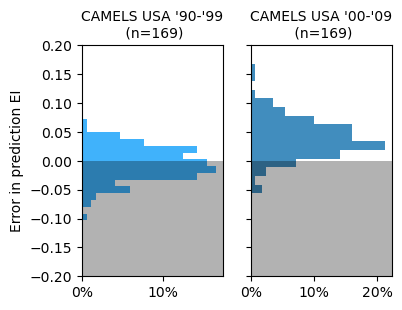

In [16]:
EI_dev = EI_dev_USA
titles = USA_titles 
bins = 15
n = len(EI_dev)


fig, axs = plt.subplots(1, n)
fig.set_figheight(3)
fig.set_figwidth(4)

EI_dev_grouped = ["", "", ""]
w = ["", "", ""]
                   
    
for j in range(n):                
    w[j] = np.ones_like(EI_dev[j])/(len(EI_dev[j]))
                    
c = colors[1:4]

for j in range(n):
    EI_dev_j = EI_dev[j]
    n_EI = len(EI_dev_j)
    print(np.median(EI_dev_j))
    axs[j].hist(EI_dev_j, bins=bins, alpha = 0.75, color = c[j], weights=w[j], orientation="horizontal")
    axs[j].set_ylim(-0.2, 0.2)
    axs[j].set_ylabel('Error in prediction EI')
    # axs[j].set_xlabel('Relative frequency')
    axs[j].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axs[j].axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    axs[j].set_title(f'{titles[j]}\n (n={n_EI})', fontsize = 10)

    
axs[-1].set_yticklabels([])
axs[1].set_yticklabels([])
axs[-1].set_ylabel('')
axs[1].set_ylabel('')



# for i in range(n):
#     ax2 = axs[i].gca().twiny()
#     sns.histplot(data=EI_dev[i], element="step", fill=False,
#     cumulative=True, stat="density", common_norm=False, color=c[i], y=EI_dev[i], linewidth=2, linestyle='solid', ax=ax2)

# ax2.grid('false')
# ax2.set_xlabel('Cumulative')

# # ax2.grid(False)
# # ax2.set_facecolor("None")

plt.savefig(f'2_Output/{output}/EI_dev_USA.pdf')   

### Meuse

-0.0046412019741478
-0.0532037457697378


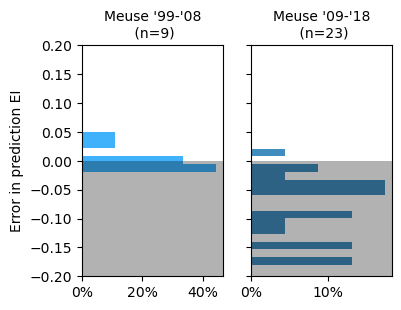

In [17]:
EI_dev = EI_dev_Meuse
titles = Meuse_titles 
bins = 5, 15
n = len(EI_dev)


fig, axs = plt.subplots(1, n)
fig.set_figheight(3)
fig.set_figwidth(4)


EI_dev_grouped = ["", "", ""]
w = ["", "", ""]
                   
    
for j in range(n):                
    w[j] = np.ones_like(EI_dev[j])/(len(EI_dev[j]))
                    
c = colors[1:4]

for j in range(n):
    EI_dev_j = EI_dev[j]
    n_EI = len(EI_dev_j)
    print(np.median(EI_dev_j))
    axs[j].hist(EI_dev_j, bins=bins[j], alpha = 0.75, color = c[j], weights=w[j], orientation="horizontal")
    axs[j].set_ylim(-0.2, 0.2)
    axs[j].set_ylabel('Error in prediction EI')
    # axs[j].set_xlabel('Relative frequency')
    axs[j].xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    axs[j].axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    axs[j].set_title(f'{titles[j]}\n (n={n_EI})', fontsize = 10)

    
axs[-1].set_yticklabels([])
axs[1].set_yticklabels([])
axs[-1].set_ylabel('')
axs[1].set_ylabel('')



# for i in range(n):
#     ax2 = axs[i].gca().twiny()
#     sns.histplot(data=EI_dev[i], element="step", fill=False,
#     cumulative=True, stat="density", common_norm=False, color=c[i], y=EI_dev[i], linewidth=2, linestyle='solid', ax=ax2)

# ax2.grid('false')
# ax2.set_xlabel('Cumulative')

# # ax2.grid(False)
# # ax2.set_facecolor("None")

plt.savefig(f'2_Output/{output}/EI_dev_Meuse.pdf')   

In [18]:
from scipy.stats import wilcoxon

# Compare EI_dev_GB_80 and EI_dev_GB_90
stat, p = wilcoxon(EI_dev_GB_80, EI_dev_GB_90)
print("\nComparing EI_dev_GB_80 and EI_dev_GB_90")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_GB_90 and EI_dev_GB_00
stat, p = wilcoxon(EI_dev_GB_90, EI_dev_GB_00)
print("\nComparing EI_dev_GB_90 and EI_dev_GB_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_USA_90 and EI_dev_USA_00
stat, p = wilcoxon(EI_dev_USA_90, EI_dev_USA_00)
print("\nComparing EI_dev_USA_90 and EI_dev_USA_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# # Compare EI_dev_Meuse_90 and EI_dev_Meuse_00
# stat, p = wilcoxon(EI_dev_Meuse_90, EI_dev_Meuse_00)
# print("\nComparing EI_dev_Meuse_90 and EI_dev_Meuse_00")
# print(f"Test statistic: {stat:.4f}")
# print(f"p-value: {p:.4f}\n")

print("The test statistic is a value that represents the difference between the two samples. In the case of the Wilcoxon rank-sum test, the test statistic is the sum of the ranks of the sample from the first group (e.g., EI_dev_GB_80) in the combined sample of both groups (EI_dev_GB_80 and EI_dev_GB_90). A larger test statistic indicates that there is a larger difference between the two samples.")

print("The p-value is the probability of obtaining a test statistic as extreme or more extreme than the one observed, assuming that the null hypothesis is true. The null hypothesis is usually that there is no difference between the two samples. In other words, the p-value is the probability of observing the data we have if the null hypothesis is true. Typically, if the p-value is less than a certain threshold (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant difference between the two samples.  ")


Comparing EI_dev_GB_80 and EI_dev_GB_90
Test statistic: 1704.0000
p-value: 0.0325


Comparing EI_dev_GB_90 and EI_dev_GB_00
Test statistic: 1197.0000
p-value: 0.0001


Comparing EI_dev_USA_90 and EI_dev_USA_00
Test statistic: 1543.0000
p-value: 0.0000

The test statistic is a value that represents the difference between the two samples. In the case of the Wilcoxon rank-sum test, the test statistic is the sum of the ranks of the sample from the first group (e.g., EI_dev_GB_80) in the combined sample of both groups (EI_dev_GB_80 and EI_dev_GB_90). A larger test statistic indicates that there is a larger difference between the two samples.
The p-value is the probability of obtaining a test statistic as extreme or more extreme than the one observed, assuming that the null hypothesis is true. The null hypothesis is usually that there is no difference between the two samples. In other words, the p-value is the probability of observing the data we have if the null hypothesis is true. Typical

## Step change analysis - Wilcoxon rank sum test

In [19]:
EI_dev_total_decades_titles = "CAMELS GB '81-'90", "CAMELS GB '91-'00", "CAMELS GB '01-'10", "CAMELS USA '90-'99", "CAMELS USA '00-'09", "Meuse '99-'08", "Meuse '09-'18"

# Compare EI_dev_GB_80 and EI_dev_GB_90
stat1, p1 = mannwhitneyu(EI_dev_GB_80, EI_dev_GB_90)
print("\nComparing EI_dev_GB_80 and EI_dev_GB_90")
print(f"Test statistic: {stat1:.0f}")
print(f"p-value: {p1:.3f}\n")

# Compare EI_dev_GB_90 and EI_dev_GB_00
stat2, p2 = mannwhitneyu(EI_dev_GB_90, EI_dev_GB_00)
print("\nComparing EI_dev_GB_90 and EI_dev_GB_00")
print(f"Test statistic: {stat2:.0f}")
print(f"p-value: {p2:.3f}\n")

# Compare EI_dev_USA_90 and EI_dev_USA_00
stat3, p3 = mannwhitneyu(EI_dev_USA_90, EI_dev_USA_00)
print("\nComparing EI_dev_USA_90 and EI_dev_USA_00")
print(f"Test statistic: {stat3:.0f}")
print(f"p-value: {p3:.3f}\n")

# Compare EI_dev_Meuse_90 and EI_dev_Meuse_00
stat4, p4 = mannwhitneyu(EI_dev_Meuse_90, EI_dev_Meuse_00)
print("\nComparing EI_dev_Meuse_90 and EI_dev_Meuse_00")
print(f"Test statistic: {stat4:.0f}")
print(f"p-value: {p4:.3f}\n")

# Create a dictionary to store the results
results = {
    "Decade 1": ["CAMELS GB '81-'90", "CAMELS GB '91-'00", "CAMELS USA '90-'99",  "Meuse '99-'08"],
    "Decade 2": ["CAMELS GB '91-'00", "CAMELS GB '01-'10", "CAMELS USA '00-'09", "Meuse '09-'18"],
    "Test statistic": [f"{stat1:.0f}", f"{stat2:.0f}", f"{stat3:.0f}", f"{stat4:.0f}"],
    "p-value": [f"{p1:.3f}", f"{p2:.3f}", f"{p3:.3f}", f"{p4:.3f}"]
}

# Create a dataframe from the dictionary
df_results = pd.DataFrame(results)

# Print the dataframe
print(df_results)
df_results.to_csv(f'2_Output/{output}/wilcoxon.csv', index=False, line_terminator='\r\n')

print(f"The results of the Wilcoxon rank-sum test indicate whether there is a significant difference between two unpaired samples.")
print(f"The test statistic is the sum of the ranks of one sample in the combined sample of both groups. A larger test statistic indicates a larger difference between the two samples.")
print(f"The p-value is the probability of observing the data under the assumption that the null hypothesis is true, where the null hypothesis is usually that there is no difference between the two samples. If the p-value is less than a certain threshold (e.g. 0.05), it suggests that there is a significant difference between the two samples and the null hypothesis can be rejected.")

NameError: name 'mannwhitneyu' is not defined

# Subquestion II) Differences between groups

In [20]:
cut1_Pa = 700
cut2_Pa = 1400

cut1_Epa = 500
cut2_Epa = 750

cut1_T = 10
cut2_T = 15

cut1_AI = 0.33
cut2_AI = 0.66

cut1_ST = 0
cut2_ST = 0.10

cut1_SI = 0.2
cut2_SI = 0.4

cut1_isdur = 4
cut2_isdur = 6

EI_dev_Pa = [[], [], []]     
EI_dev_Epa = [[], [], []] 
EI_dev_T = [[], [], []] 
EI_dev_AI = [[], [], []] 
EI_dev_ST = [[], [], []] 
EI_dev_SI = [[], [], []] 
EI_dev_isdur = [[], [], []] 

descriptors_names = ['Precipitation', 'Potential Evaporation', 'Temperature', 'Aridity Index', 'Seasonality Index', 'Interstorm duration', 'Seasonality Timing Index']
descriptors = ['Pa', 'Epa', 'T', 'AI', 'SI', 'is_dur', 'ST']
EI_dev_descriptors = EI_dev_Pa, EI_dev_Epa, EI_dev_T, EI_dev_AI, EI_dev_SI, EI_dev_isdur, EI_dev_ST

### Precipitation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 48, n2 162, n3 75

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 1.0087
p-value: 0.3131


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.1956
p-value: 0.8450

Group 1 has a mean of 0.01 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 10, n2 286, n3 42

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -1.5937
p-value: 0.1110


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1.0055
p-value: 0.3147

Group 1 has a mean of 0.00 and std of 0.01
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.05
Meuse
n1 0, n2 32, n3 0
Group 2 has a mean of -0.06 and std of 0.06


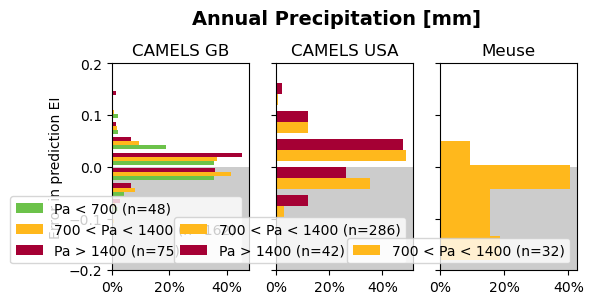

In [38]:
des = 'Pa'                
cut1, cut2 = cut1_Pa, cut2_Pa
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if u ==0 or u ==1:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                    
                    EI_dev_des = EI_dev_des_Meuse
                        
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')


    
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        
        ax.set_yticklabels([])
        
    if u == 3:
        EI_dev_des = EI_dev_des[1:2]
        w = w[1:2]
        labels = labels[1:2]
        c = colors2[1:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        ax.set_yticklabels([])
    
        
    ax.legend(loc='lower right')
fig.suptitle('Annual Precipitation [mm]', fontweight='bold', fontsize=14)
plt.subplots_adjust(top=0.80)


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')



plt.savefig(f'2_Output/{output}/P.pdf')  

### Potential evaporation

CAMELS GB
n1 54, n2 231, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.4420
p-value: 0.6585

Group 1 has a mean of 0.01 and std of 0.05
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 0, n2 0, n3 338
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 32, n3 0
Group 2 has a mean of -0.06 and std of 0.06


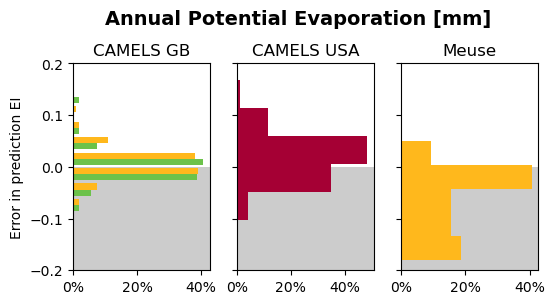

In [39]:
des = 'Epa'                
cut1, cut2 = cut1_Epa, cut2_Epa
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}'] 
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')

        
    if u == 1:
        EI_dev_des = EI_dev_des[2:3]
        w = w[2:3]
        labels = labels[2:3]
        c = colors2[2:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        ax.set_yticklabels([])


        
    if u == 3:
        EI_dev_des = EI_dev_des[1:2]
        w = w[1:2]
        labels = labels[1:2]
        c = colors2[1:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])


        
    # ax.legend(loc='lower right')

    
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    
fig.suptitle('Annual Potential Evaporation [mm]', fontweight='bold', fontsize=14)
plt.subplots_adjust(top=0.80)    
    
plt.savefig(f'2_Output/{output}/Ep.pdf')  

### Temperature

CAMELS GB
n1 246, n2 39, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.6127
p-value: 0.5400

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of -0.00 and std of 0.02
CAMELS USA
n1 4, n2 282, n3 52

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.7671
p-value: 0.4430


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 0.2438
p-value: 0.8074

Group 1 has a mean of -0.00 and std of 0.07
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 13, n2 19, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -1.2854
p-value: 0.1987

Group 1 has a mean of -0.08 and std of 0.07
Group 2 has a mean of -0.04 and std of 0.05


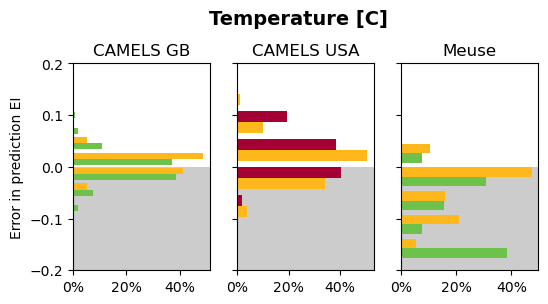

In [40]:
des = 'T'                
cut1, cut2 = cut1_T, cut2_T
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])

        
        
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
    # ax.legend(loc='lower right')
fig.suptitle('Temperature [C]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/T.pdf')  

### Aridity Index

CAMELS GB
n1 60, n2 117, n3 108

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.8088
p-value: 0.4186


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.9757
p-value: 0.3292

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 0, n2 28, n3 310

Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.0279
p-value: 0.3040

Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 15, n3 17

Comparing group 2 (yellow) and group 3 (red)
Test statistic: -2.3224
p-value: 0.0202

Group 2 has a mean of -0.09 and std of 0.07
Group 3 has a mean of -0.03 and std of 0.05


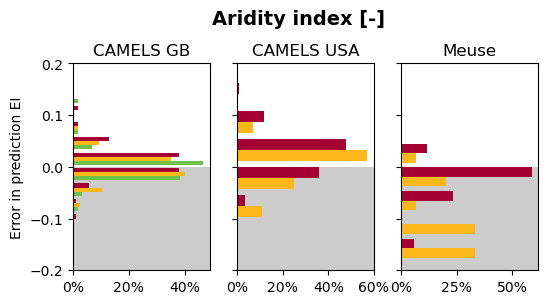

In [41]:
des = 'AI'                
cut1, cut2 = cut1_AI, cut2_AI
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])

        
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
        
    # ax.legend(loc='lower right')
fig.suptitle('Aridity index [-]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    

plt.savefig(f'2_Output/{output}/AI.pdf')  

### Interstorm duration

CAMELS GB
n1 168, n2 117, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.3580
p-value: 0.7204

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 42, n2 262, n3 34

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.3063
p-value: 0.7594


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1.3481
p-value: 0.1776

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.02
Meuse
n1 11, n2 21, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -2.4797
p-value: 0.0131

Group 1 has a mean of -0.09 and std of 0.06
Group 2 has a mean of -0.04 and std of 0.06


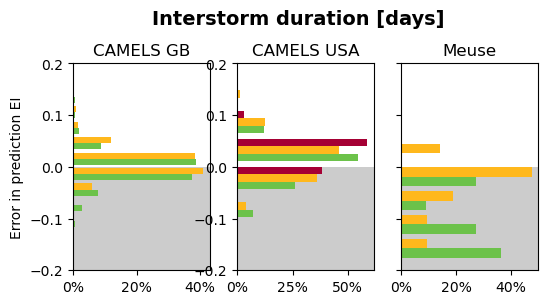

In [42]:
des = 'is_dur'                
cut1, cut2 = cut1_isdur, cut2_isdur
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])

        
        
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')        
    # ax.legend(loc='lower right')
fig.suptitle('Interstorm duration [days]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    

plt.savefig(f'2_Output/{output}/Is_dur.pdf')  

### Seasonality index

CAMELS GB
n1 165, n2 120, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.5968
p-value: 0.5506

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 170, n2 138, n3 30

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.1518
p-value: 0.8793


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.1637
p-value: 0.2445

Group 1 has a mean of 0.02 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.03
Meuse
n1 28, n2 4, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2.2222
p-value: 0.0263

Group 1 has a mean of -0.05 and std of 0.06
Group 2 has a mean of -0.13 and std of 0.06


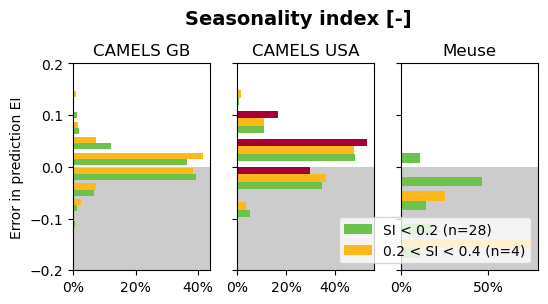

In [43]:
des = 'SI'                
cut1, cut2 = cut1_SI, cut2_SI
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

        
ax.legend(loc='lower right')
fig.suptitle('Seasonality index [-]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    

plt.savefig(f'2_Output/{output}/SI.pdf')  

### Seasonality timing index

CAMELS GB
n1 0, n2 69, n3 216

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1.7165
p-value: 0.0861

Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 54, n2 70, n3 214

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.2621
p-value: 0.7933


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.3839
p-value: 0.7010

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 32, n3 0
Group 2 has a mean of -0.06 and std of 0.06


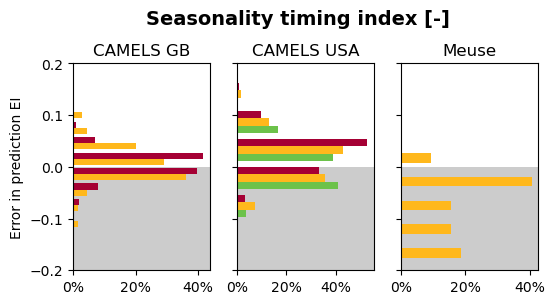

In [44]:
des = 'ST'                
cut1, cut2 = cut1_ST, cut2_ST
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
EI_dev_des_Meuse = [[], [], []]

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if u ==0 or u ==1:

                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:2]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')        
    # ax.legend(loc='lower right')
fig.suptitle('Seasonality timing index [-]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/ST.pdf')  

## Change by change

### Precipitation 

CAMELS GB
n1 42, n2 57, n3 186

Comparing group 1 (red) and group 2 (yellow)
Test statistic: -1.1823
p-value: 0.2371


Comparing group 2 (yellow) and group 3 (green)
Test statistic: 2.5522
p-value: 0.0107


Comparing group 1 (red) and group 3 (green)
Test statistic: 0.7770
p-value: 0.4372

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.01 and std of 0.02
Group 3 has a mean of 0.00 and std of 0.04
CAMELS USA
n1 118, n2 52, n3 168

Comparing group 1 (red) and group 2 (yellow)
Test statistic: 2.4586
p-value: 0.0139


Comparing group 2 (yellow) and group 3 (green)
Test statistic: 2.4731
p-value: 0.0134


Comparing group 1 (red) and group 3 (green)
Test statistic: 7.7581
p-value: 0.0000

Group 1 has a mean of 0.04 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.05
Group 3 has a mean of 0.00 and std of 0.03
Meuse
n1 18, n2 0, n3 17

Comparing group 1 (red) and group 3 (green)
Test statistic: -3.9936
p-value: 0.0001

Group 1 has a mean of -0.07 and std of 0.07
Grou

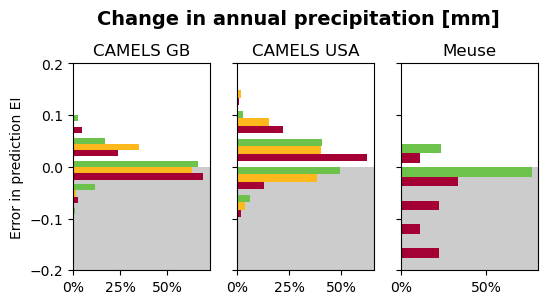

In [208]:
des = 'Pa'                
change1 = -20
change2 = 20

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (red) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (green)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 and n3 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[2])
            print("\nComparing group 1 (red) and group 3 (green)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0], EI_dev_des[2]
        w = w[0], w[2]
        labels = labels[0], labels[2]
        c = colors3[0], colors3[2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    # ax.legend(loc='lower right')
    
fig.suptitle('Change in annual precipitation [mm]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    

plt.savefig(f'2_Output/{output}/dP.pdf')  

### Potential evaporation

CAMELS GB
n1 1, n2 197, n3 87

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -1.2509
p-value: 0.2110


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -3.5462
p-value: 0.0004

Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.03
CAMELS USA
n1 103, n2 186, n3 49

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.0382
p-value: 0.9695


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.5944
p-value: 0.1109

Group 1 has a mean of 0.02 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 8, n3 27

Comparing group 2 (yellow) and group 3 (red)
Test statistic: -3.7712
p-value: 0.0002

Group 2 has a mean of -0.12 and std of 0.07
Group 3 has a mean of -0.01 and std of 0.03


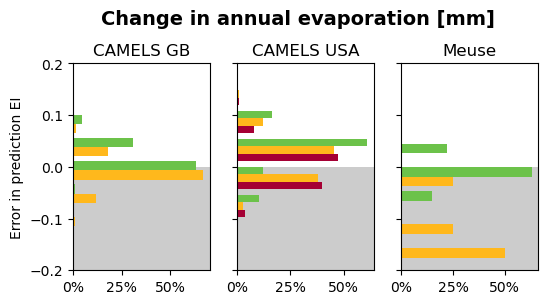

In [209]:
des = 'Epa'                
change1 = -10
change2 = 10

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
fig.suptitle('Change in annual evaporation [mm]', fontweight='bold', fontsize=14)
plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/dEp.pdf')  

### Temperature

CAMELS GB
n1 0, n2 97, n3 188

Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.4486
p-value: 0.1475

Group 2 has a mean of 0.00 and std of 0.05
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 18, n2 205, n3 115

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2.3090
p-value: 0.0209


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5.1749
p-value: 0.0000

Group 1 has a mean of 0.05 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
Meuse
n1 0, n2 4, n3 31

Comparing group 2 (yellow) and group 3 (red)
Test statistic: -3.2146
p-value: 0.0013

Group 2 has a mean of -0.18 and std of 0.01
Group 3 has a mean of -0.01 and std of 0.03


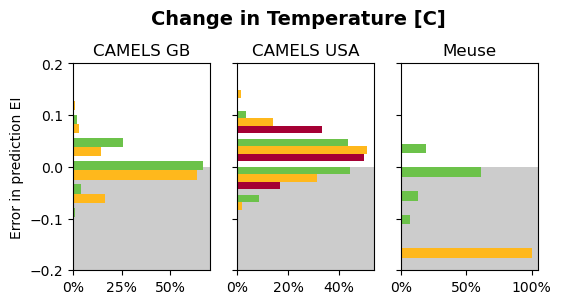

In [210]:
des = 'T'                
change1 = -0.2
change2 = 0.2

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    
fig.suptitle('Change in Temperature [C]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/dT.pdf')  

### Aridity Index

CAMELS GB
n1 66, n2 196, n3 23

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -1.1776
p-value: 0.2390


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.6975
p-value: 0.0896

Group 1 has a mean of 0.00 and std of 0.05
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.02 and std of 0.03
CAMELS USA
n1 98, n2 166, n3 74

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -2.8747
p-value: 0.0040


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -3.3804
p-value: 0.0007

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.03 and std of 0.03
Meuse
n1 2, n2 17, n3 16

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -1.9926
p-value: 0.0463


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 4.8269
p-value: 0.0000

Group 1 has a mean of -0.02 and std of 0.00
Group 2 has a mean of 0.01 and std of 0.02
Group 3 has a mean of -0.08 and std of 0

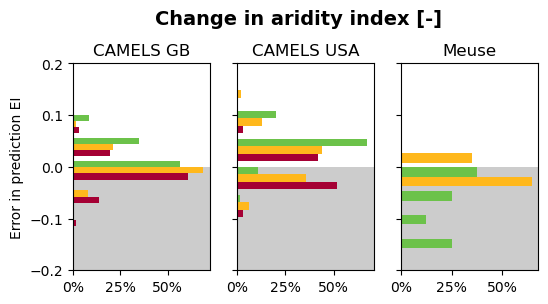

In [211]:
des = 'AI'                
change1 = -0.05
change2 = 0.05

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    
fig.suptitle('Change in aridity index [-]', fontweight='bold', fontsize=14)

plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/dAI.pdf') 

### Interstorm duration

CAMELS GB
n1 9, n2 274, n3 2

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.7616
p-value: 0.4463


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.2578
p-value: 0.7965

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.00 and std of 0.00
CAMELS USA
n1 31, n2 268, n3 39

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -2.2162
p-value: 0.0267


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -2.9945
p-value: 0.0027

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.03 and std of 0.03
Meuse
n1 17, n2 18, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 3.9936
p-value: 0.0001

Group 1 has a mean of 0.00 and std of 0.02
Group 2 has a mean of -0.07 and std of 0.07


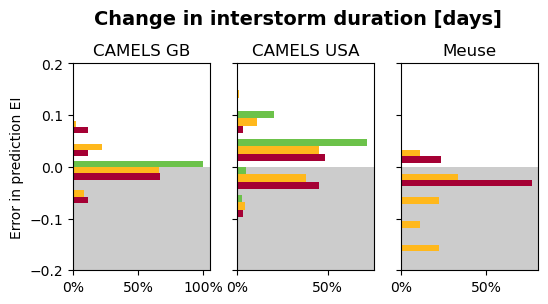

In [212]:
des = 'is_dur'                
change1 = -0.5
change2 = 0.5

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    
fig.suptitle('Change in interstorm duration [days]', fontweight='bold', fontsize=14)
plt.subplots_adjust(top=0.80)    


plt.savefig(f'2_Output/{output}/dIs_dur.pdf')  

### Seasonality index

CAMELS GB
n1 73, n2 112, n3 100

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -0.8034
p-value: 0.4217


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 0.0022
p-value: 0.9982

Group 1 has a mean of -0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.01 and std of 0.05
CAMELS USA
n1 99, n2 116, n3 123

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 3.2860
p-value: 0.0010


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.6047
p-value: 0.5454

Group 1 has a mean of 0.03 and std of 0.03
Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.03
Meuse
n1 14, n2 7, n3 14

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2.7604
p-value: 0.0058


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.1191
p-value: 0.2631

Group 1 has a mean of 0.01 and std of 0.02
Group 2 has a mean of -0.10 and std of 0.09
Group 3 has a mean of -0.03 and std of 

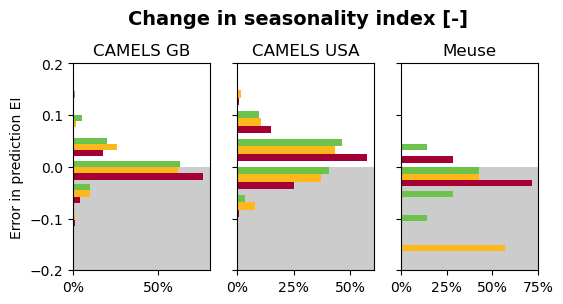

In [213]:
des = 'SI'                
change1 = -0.02
change2 = 0.02

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')
    
fig.suptitle('Change in seasonality index [-]', fontweight='bold', fontsize=14)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
plt.subplots_adjust(top=0.80)    

plt.savefig(f'2_Output/{output}/dSI.pdf')  

### Seasonality timing index

CAMELS GB
n1 62, n2 72, n3 151

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 0.6738
p-value: 0.5004


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -0.7791
p-value: 0.4359

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.01 and std of 0.04
CAMELS USA
n1 122, n2 46, n3 170

Comparing group 1 (green) and group 2 (yellow)
Test statistic: -2.4615
p-value: 0.0138


Comparing group 2 (yellow) and group 3 (red)
Test statistic: -1.6408
p-value: 0.1008

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.03
Group 3 has a mean of 0.03 and std of 0.04
Meuse
n1 19, n2 10, n3 6

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 4.0836
p-value: 0.0000


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1.0847
p-value: 0.2781

Group 1 has a mean of 0.01 and std of 0.02
Group 2 has a mean of -0.06 and std of 0.06
Group 3 has a mean of -0.10 and std of 0.

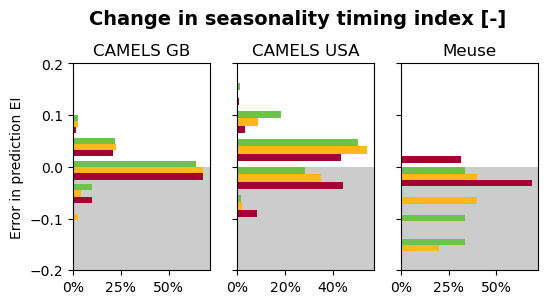

In [33]:
des = 'ST'                
change1 = -0.02
change2 = 0.02

fig, axes = plt.subplots(1, 3, figsize=(6, 3))

axes[0].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[1].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)
axes[2].axhspan(-0.2, -0.0, facecolor='black', alpha=0.2)

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = ranksums(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = ranksums(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')
        ax.set_yticklabels([])

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        ax.set_yticklabels([])
        
    # ax.legend(loc='lower right')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')    
plt.subplots_adjust(top=0.80)    
fig.suptitle('Change in seasonality timing index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dST.pdf')  